## Heart Attack Risk Prediction Using Health and Lifestyle Data

#### Project Overview
This project aims to predict heart attack risk using a dataset containing various health indicators, lifestyle choices, and socioeconomic factors. The goal is to develop a machine learning model that can assist healthcare providers in identifying high-risk patients and providing early interventions.

#### Problem Statement
Heart attacks are a leading cause of death globally. Early detection of high-risk individuals can save lives through timely treatment and lifestyle changes. This project uses a dataset containing health metrics, lifestyle factors, and medical history to predict the likelihood of a heart attack. By leveraging this data, we aim to develop a predictive model that can provide actionable insights for healthcare practitioners.

#### Importing necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data Exploration

In [2]:
# Import the dataset
data = pd.read_csv("C:/Users/Admin/Downloads/heart_attack_dataset.csv")

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
data.describe

<bound method NDFrame.describe of      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1     

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

#### Exploratory Data Analysis (EDA)

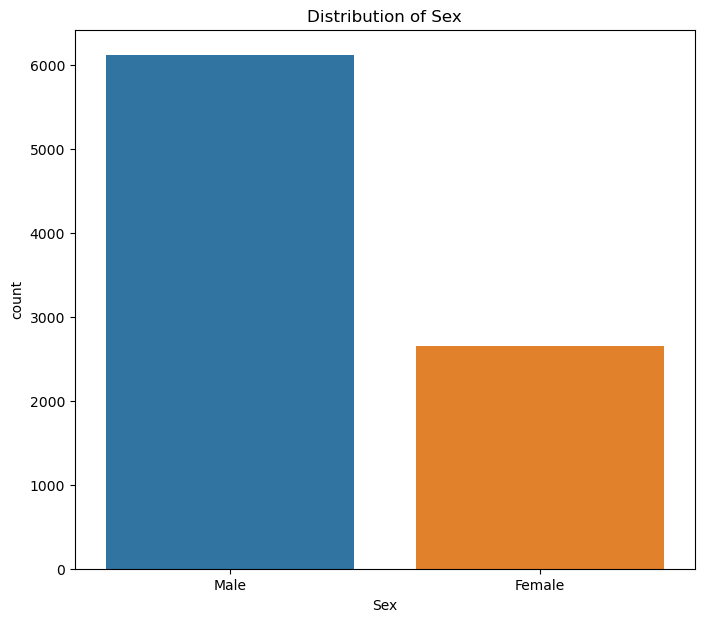

In [7]:
# PLot for Sex
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=sex_counts.index, y=sex_counts)
plt.title('Distribution of Sex')
plt.show()

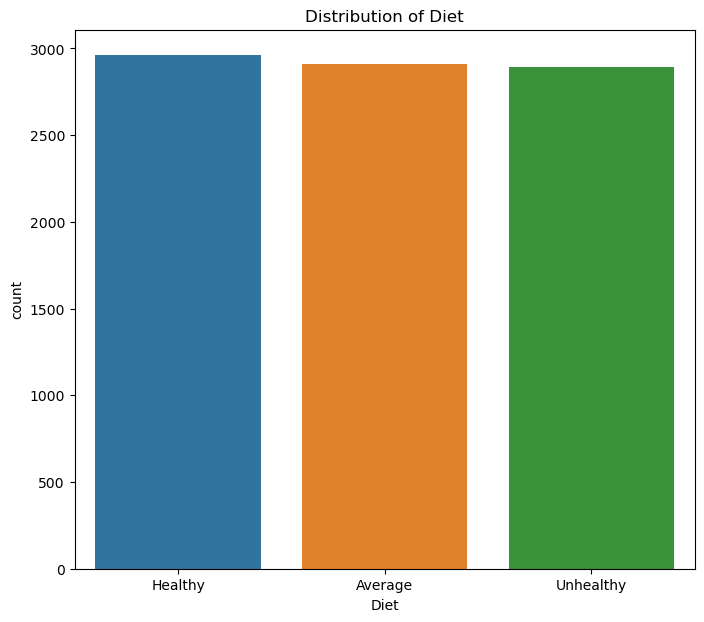

In [8]:
# Plot for Diet
diet_counts = data['Diet'].value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=diet_counts.index, y=diet_counts)
plt.title('Distribution of Diet')
plt.show()

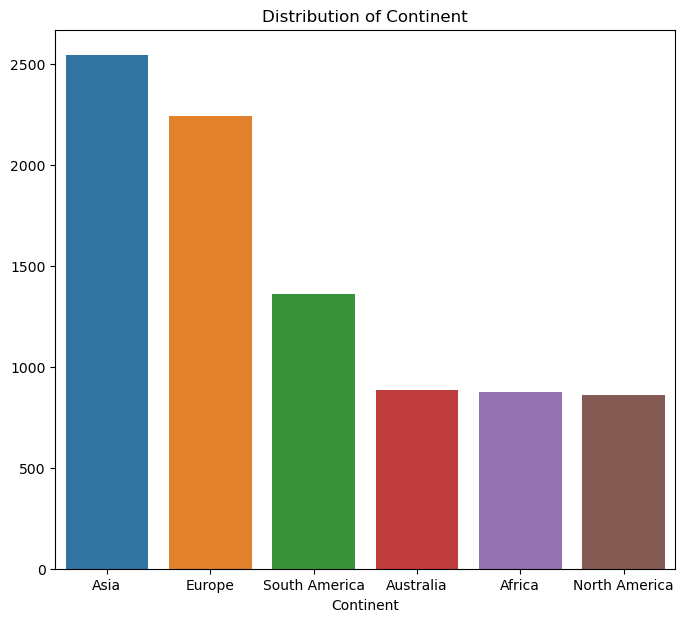

In [9]:
# Plot for Continent
continent_counts = data['Continent'].value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribution of Continent')
plt.show()

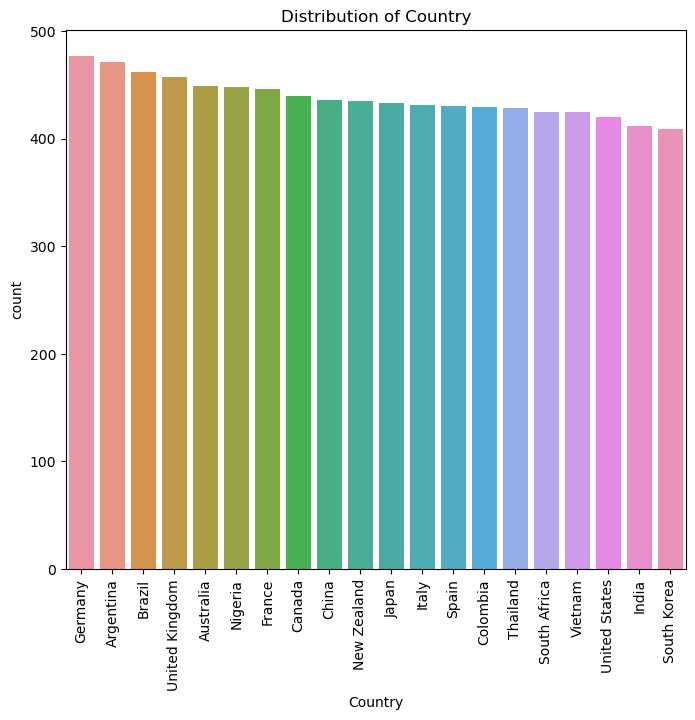

In [10]:
# Plot for Country
country_counts = data['Country'].value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=country_counts.index, y=country_counts)
plt.title('Distribution of Country')
plt.xticks(rotation=90)
plt.show()

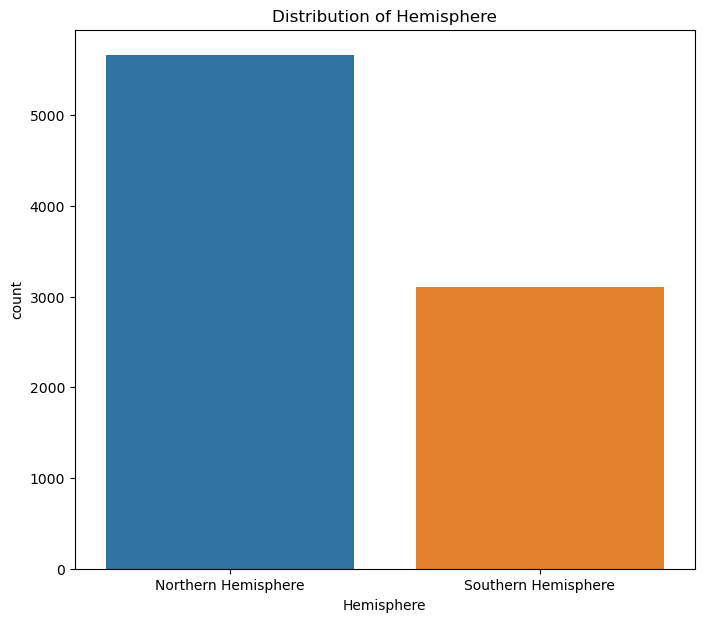

In [11]:
# Plot for Hemisphere
hemisphere_counts = data['Hemisphere'].value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=hemisphere_counts.index, y=hemisphere_counts)
plt.title('Distribution of Hemisphere')
plt.show()

#### The dataset reveals that the majority of observations are from males, following a healthy diet. Geographically, most data points come from Asia, with Germany having the highest count among countries. The majority of samples are from the Northern Hemisphere.

#### Correlation between Variables using HeatMap

<Axes: >

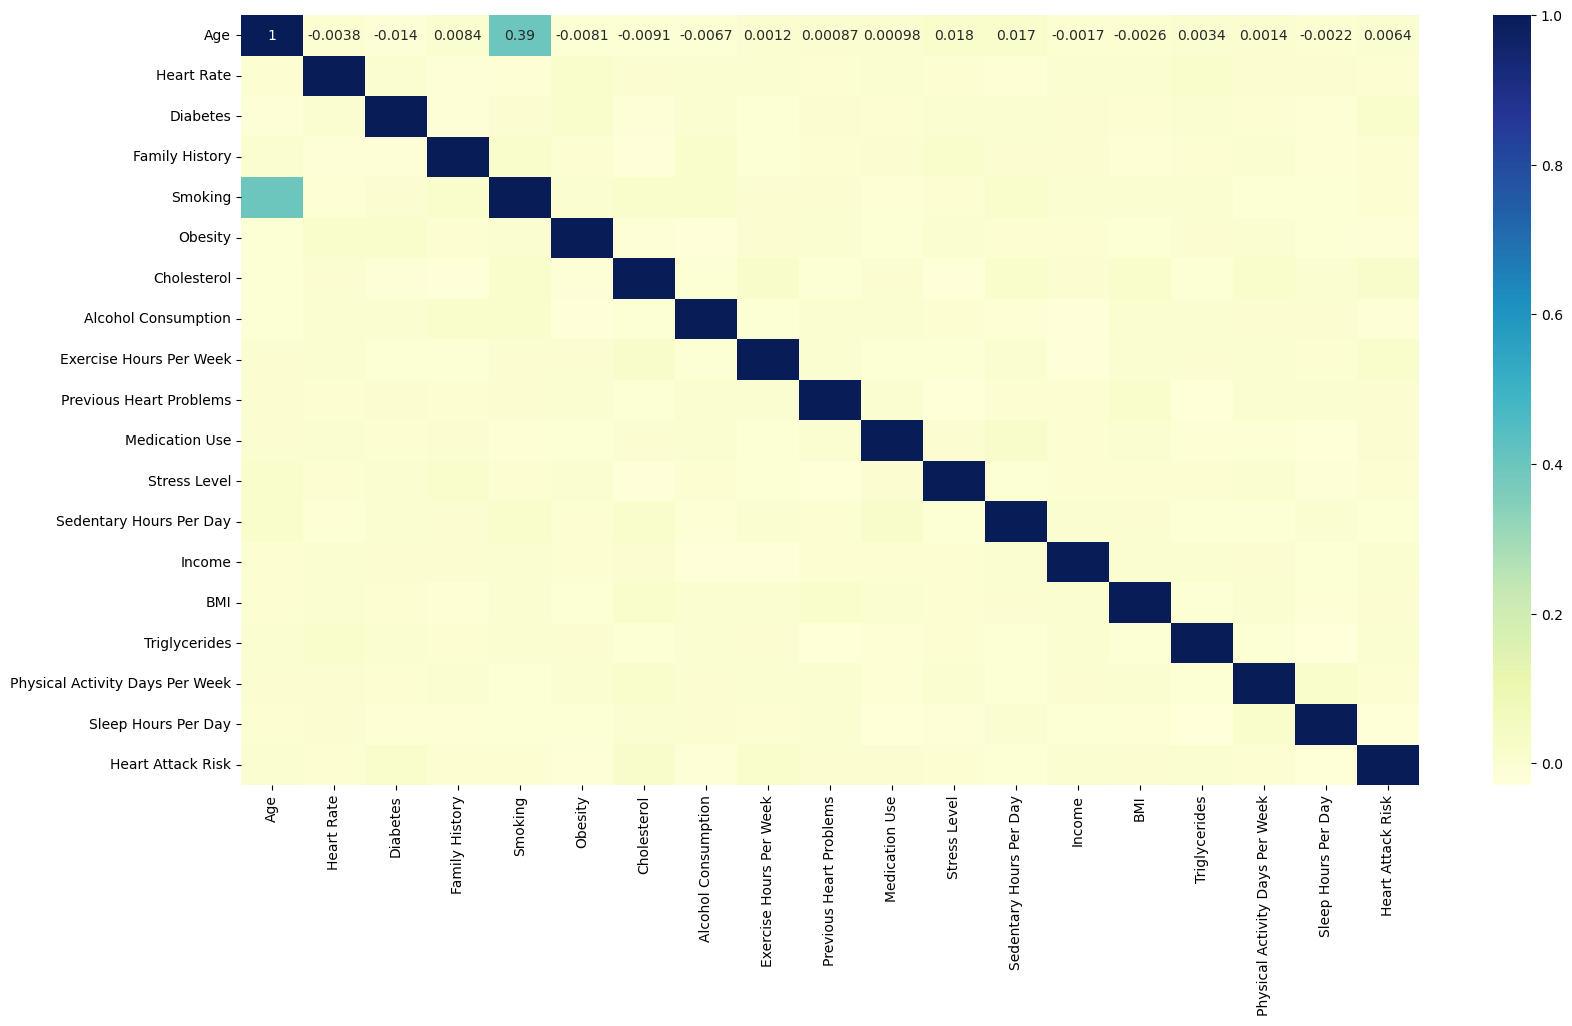

In [12]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Cholesterol',
                  'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems',
                  'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 
                  'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
                  'Heart Attack Risk']].corr(), cmap="YlGnBu", annot=True)

**Key Findings**

* Heart Attack risk has **highest correlation** with **Diabetes, Cholestrol and Exercise Hours Per Weak**
* Heart attack Risk is **not much dependent** on **Sedentary Hours Per Day**
* **Alcohol Consumption** has **no stronger link** with **Heart Attack Risk**
* **Smoking** is **not a major cause** of **Heart Attack**ttack

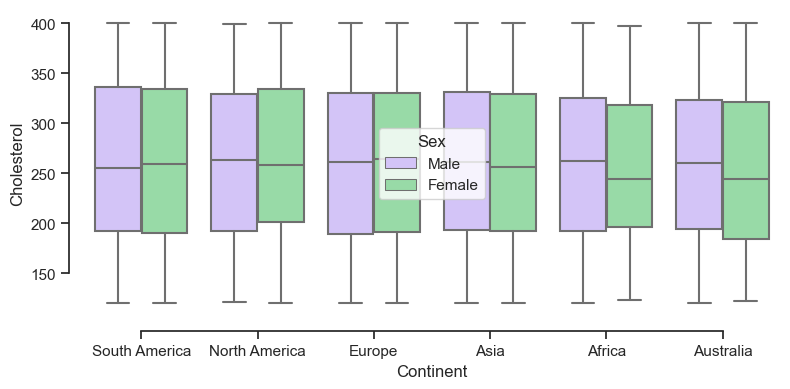

In [13]:
#Continents w.r.t Cholestrol Level range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex",
             palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

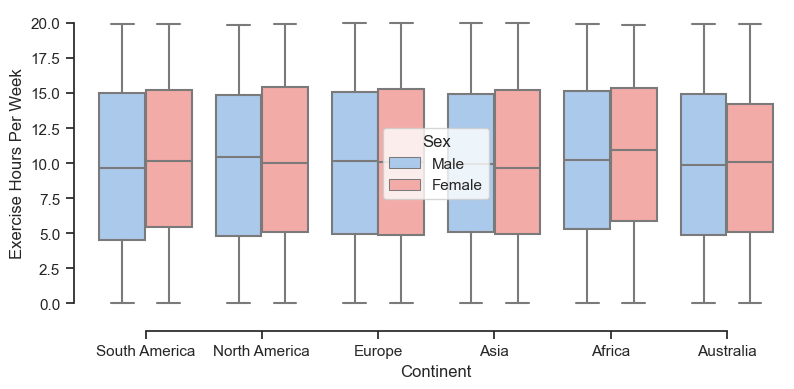

In [14]:
#Continents w.r.t Exercise Hours Per Week range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Exercise Hours Per Week',  hue="Sex",
             palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True)

In [15]:
data.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


#### Feature Engineering

In [16]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [17]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [18]:
# Setting column 'Blood Pressure'    
# Splitting Between Diastolic and Systolic Blood Pressure

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [19]:
# Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy
#sUsing Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)

In [20]:
# OneHot encoding for Sex
data = pd.get_dummies(data, columns = ['Sex'])

In [21]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [22]:
# Converting 'Object' and 'Boolean' Datatype into int
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [23]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

#### Model Building

In [24]:
# Splitting the columns
X = data[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 
          'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 
          'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
          'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
          'Physical Activity Days Per Week', 'Sleep Hours Per Day',
          'BP_Systolic', 'BP_Diastolic','Sex_Female', 'Sex_Male']]
        
y=data['Heart Attack Risk'].values

In [25]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state = 42)

#### Feature Scaling

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1125    0]
 [ 628    0]]


0.6417569880205363

#### KNeighbors Classifier Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[860 265]
 [476 152]]


0.5772960638904735

#### Support Vector Classifier Model (SVC)

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1125    0]
 [ 628    0]]


0.6417569880205363

#### Kernel SVC Model

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1122    3]
 [ 628    0]]


0.6400456360524814

#### Naive Bayes Model

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1125    0]
 [ 628    0]]


0.6417569880205363

#### Decision Tree Classifier Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[711 414]
 [409 219]]


0.5305191100969766

#### Random Forest Classifier Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[986 139]
 [541  87]]


0.612093553907587

#### Result:
Three models Logistic Regression, Support Vector Classifier (SVC), and Naive Bayes each achieved the highest accuracy of **64.18%** in predicting heart attack risk. The consistency of this accuracy across different models suggests that the underlying patterns in the dataset are effectively captured by these algorithms, despite their distinct approaches to classification. While this performance indicates that the models can identify significant predictors of heart attack risk, the accuracy level also points to potential areas for improvement, such as exploring advanced feature engineering, model optimization, or incorporating more sophisticated algorithms.

#### Conclusion:
This project effectively demonstrated the capability of machine learning to predict heart attack risk using health and lifestyle data. The highest performing models Logistic Regression, SVC, and Naive Bayes achieved an accuracy of **64.18%**, reflecting a reasonable baseline for predictive accuracy in this domain. However, this result also highlights the need for further refinement. Future efforts could focus on enhancing model performance through hyperparameter tuning, adding more diverse data, or experimenting with ensemble methods.

The project sets a strong foundation for ongoing research and development in predictive analytics for healthcare. With further improvements, this approach has the potential to significantly aid healthcare professionals in early identification and intervention for individuals at risk of heart attacks, ultimately contributing to better patient outcomes.

